# Applied Machine Learning: Unsupervised Learning

## Preamble and Datasets

In [1]:
%matplotlib notebook
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

# Breast cancer dataset
cancer = load_breast_cancer()
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)   #if true, returns (data, target)
# X_cancer = cancer.data     #same, shape: (569,30)
# y_cancer = cancer.target   #same, shape: (569,)

# Our sample fruits dataset
fruits = pd.read_table('fruit_data_with_colors.txt')
X_fruits = fruits[['mass','width','height', 'color_score']]
y_fruits = fruits[['fruit_label']] - 1

D:\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  from ipykernel import kernelapp as app


In [10]:
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [11]:
cancer.data.shape

(569, 30)

In [12]:
cancer.target.shape

(569,)

In [14]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [18]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

## Dimensionality Reduction and Manifold Learning

### Principal Components Analysis (PCA)

#### Using PCA to find the first two principal components of the breast cancer dataset

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)

# Before applying PCA, each feature should be centered (zero mean) and with unit variance
X_normalized = StandardScaler().fit(X_cancer).transform(X_cancer)  

pca = PCA(n_components = 2).fit(X_normalized)
X_pca = pca.transform(X_normalized)

print(X_cancer.shape, X_pca.shape)

(569, 30) (569, 2)


#### Plotting the PCA-transformed version of the breast cancer dataset

<IPython.core.display.Javascript object>


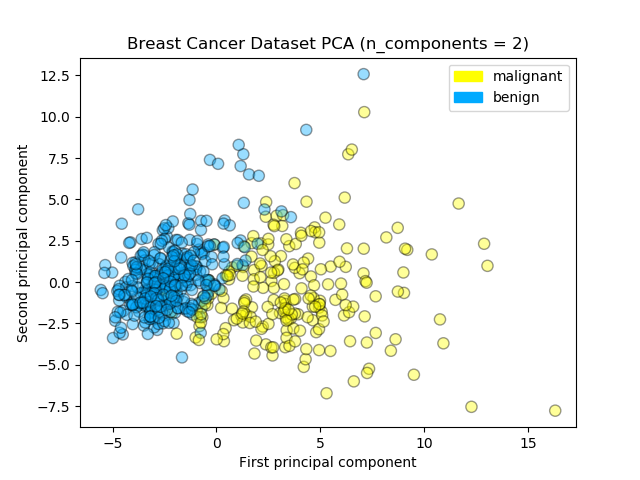

In [3]:
from adspy_shared_utilities import plot_labelled_scatter
plot_labelled_scatter(X_pca, y_cancer, ['malignant', 'benign'])

plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.title('Breast Cancer Dataset PCA (n_components = 2)');

#### Plotting the magnitude of each feature value for the first two principal components

<IPython.core.display.Javascript object>


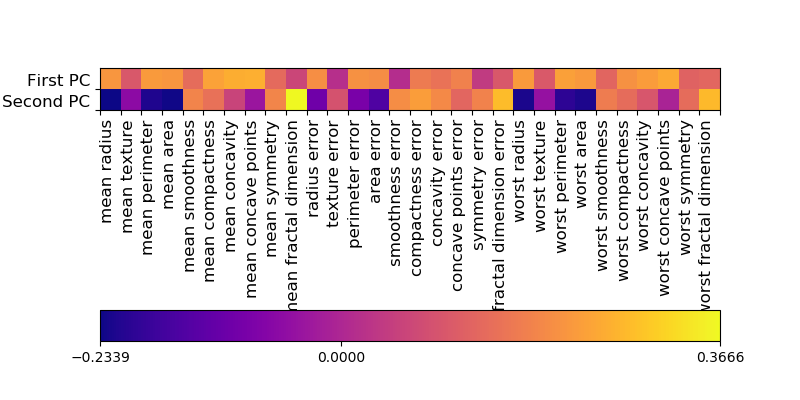

In [4]:
fig = plt.figure(figsize=(8, 4))
plt.imshow(pca.components_, interpolation = 'none', cmap = 'plasma')
feature_names = list(cancer.feature_names)

plt.gca().set_xticks(np.arange(-.5, len(feature_names)));
plt.gca().set_yticks(np.arange(0.5, 2));
plt.gca().set_xticklabels(feature_names, rotation=90, ha='left', fontsize=12);
plt.gca().set_yticklabels(['First PC', 'Second PC'], va='bottom', fontsize=12);

plt.colorbar(orientation='horizontal', ticks=[pca.components_.min(), 0, 
                                              pca.components_.max()], pad=0.65);

In [84]:
pca.components_.shape

(2, 30)

In [82]:
pc1, pc2 = pca.components_
pc1

array([0.21890244, 0.10372458, 0.22753729, 0.22099499, 0.14258969,
       0.23928535, 0.25840048, 0.26085376, 0.13816696, 0.06436335,
       0.20597878, 0.01742803, 0.21132592, 0.20286964, 0.01453145,
       0.17039345, 0.15358979, 0.1834174 , 0.04249842, 0.10256832,
       0.22799663, 0.10446933, 0.23663968, 0.22487053, 0.12795256,
       0.21009588, 0.22876753, 0.25088597, 0.12290456, 0.13178394])

In [77]:
np.argmin(pc1)

14

In [79]:
np.argmax(pc1)

7

In [81]:
feature_names[0]

'mean radius'

In [78]:
feature_names[np.argmin(pc1)]   #pc1 least principal conponent

'smoothness error'

In [80]:
feature_names[np.argmax(pc1)]   #pc1 most principal conponent

'mean concave points'

In [88]:
print('pc1 least principal conponent: ', feature_names[np.argmin(pc1)])
print('pc1 most principal conponent: ', feature_names[np.argmax(pc1)])

pc1 least principal conponent:  smoothness error
pc1 most principal conponent:  mean concave points


In [87]:
print('pc2 least principal conponent: ', feature_names[np.argmin(pc2)])
print('pc2 most principal conponent: ', feature_names[np.argmax(pc2)])

pc2 least principal conponent:  mean radius
pc2 most principal conponent:  mean fractal dimension


#### PCA on the fruit dataset (for comparison)

In [88]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# each feature should be centered (zero mean) and with unit variance
X_normalized = StandardScaler().fit(X_fruits).transform(X_fruits)  

pca = PCA(n_components = 2).fit(X_normalized)
X_pca = pca.transform(X_normalized)

In [91]:
X_pca

array([[ 1.57216938, -1.98004398],
       [ 0.87841688, -1.5793734 ],
       [ 0.52977322, -1.73289051],
       [-2.71261023,  0.41467382],
       [-2.89341158,  0.24200292],
       [-3.14907175, -0.0227446 ],
       [-3.16435024,  0.48979866],
       [-3.39197004,  0.49705157],
       [-0.1337842 ,  1.92251073],
       [-0.21783491,  1.77601184],
       [-0.61983992,  2.02528232],
       [-0.27623512,  1.93637892],
       [-0.65153341,  1.44776118],
       [ 0.28790153, -0.6930091 ],
       [ 0.23873686, -0.69117127],
       [ 0.28247682, -0.61002894],
       [ 0.40154031, -0.95274558],
       [ 0.37479841, -0.23727398],
       [-0.09457474,  1.03234545],
       [-0.17247687,  1.2237516 ],
       [-0.03541549,  1.31528018],
       [-0.14616449,  1.04663218],
       [-0.57656054,  1.37171952],
       [ 0.2545604 ,  1.55238094],
       [ 4.06190602,  0.7801176 ],
       [ 4.29183685,  0.92853405],
       [ 4.66783223,  0.95558303],
       [ 1.28997005,  0.08988633],
       [-0.67982451,

In [108]:
y_cancer
# y_cancer.shape

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [101]:
np.array(y_fruits)
# np.array(y_fruits).shape

array([[0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3]], dtype=int64)

In [106]:
np.array(y_fruits).reshape(-1)
# np.array(y_fruits).reshape(-1).shape

array([0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], dtype=int64)

In [66]:
y_fruits.as_matrix()

D:\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


array([[0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3]], dtype=int64)

In [65]:
y_fruits.as_matrix().reshape(-1)

D:\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


array([0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], dtype=int64)

<IPython.core.display.Javascript object>


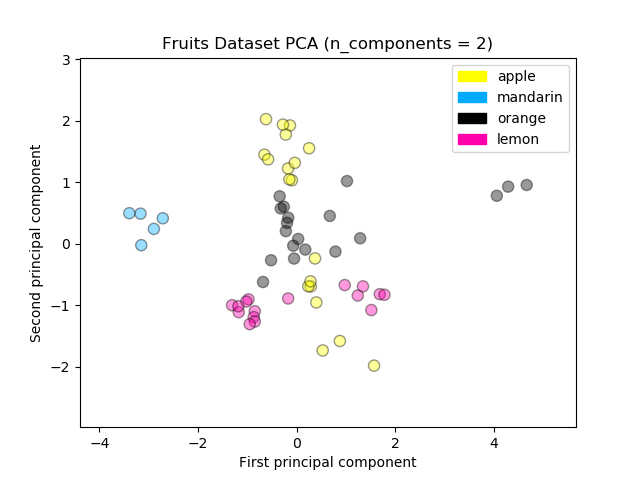

In [95]:
from adspy_shared_utilities import plot_labelled_scatter
plot_labelled_scatter(X_pca, np.array(y_fruits).reshape(-1), ['apple', 'mandarin', 'orange', 'lemon'])

plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.title('Fruits Dataset PCA (n_components = 2)');

### Manifold learning methods

#### Multidimensional scaling (MDS) on the fruit dataset

<IPython.core.display.Javascript object>


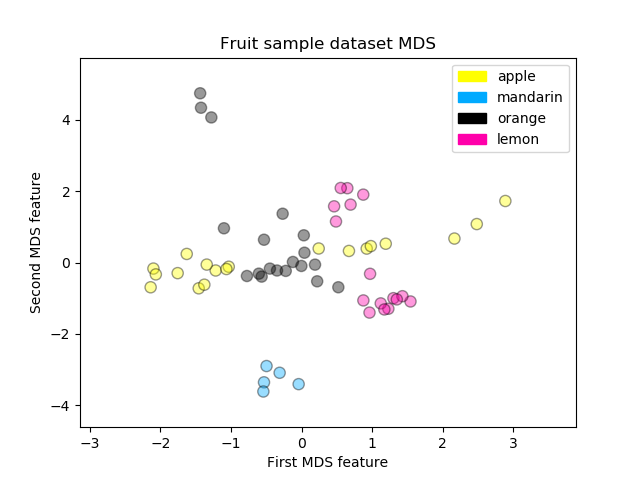

In [96]:
from adspy_shared_utilities import plot_labelled_scatter
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import MDS

# each feature should be centered (zero mean) and with unit variance
X_fruits_normalized = StandardScaler().fit(X_fruits).transform(X_fruits)  

mds = MDS(n_components = 2)

X_fruits_mds = mds.fit_transform(X_fruits_normalized)

plot_labelled_scatter(X_fruits_mds, np.array(y_fruits).reshape(-1), ['apple', 'mandarin', 'orange', 'lemon'])
plt.xlabel('First MDS feature')
plt.ylabel('Second MDS feature')
plt.title('Fruit sample dataset MDS');

#### Multidimensional scaling (MDS) on the breast cancer dataset

(This example is not covered in the lecture video, but is included here so you can compare it to the results from PCA.)

<IPython.core.display.Javascript object>


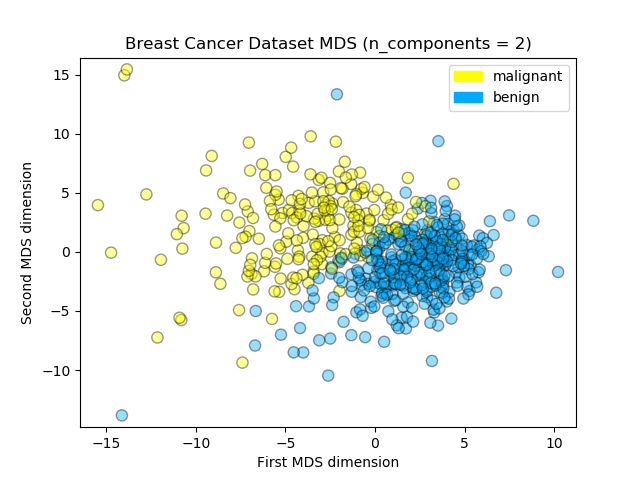

In [97]:
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import MDS
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)      #if true, returns (data, target)

# each feature should be centered (zero mean) and with unit variance
X_normalized = StandardScaler().fit(X_cancer).transform(X_cancer)  

mds = MDS(n_components = 2)

X_mds = mds.fit_transform(X_normalized)

from adspy_shared_utilities import plot_labelled_scatter
plot_labelled_scatter(X_mds, y_cancer, ['malignant', 'benign'])

plt.xlabel('First MDS dimension')
plt.ylabel('Second MDS dimension')
plt.title('Breast Cancer Dataset MDS (n_components = 2)');

### t-SNE

#### t-SNE on the fruit dataset

(This example from the lecture video is included so that you can see how some dimensionality reduction methods may be less successful on some datasets. Here, it doesn't work as well at finding structure in the small fruits dataset, compared to other methods like MDS.)

<IPython.core.display.Javascript object>


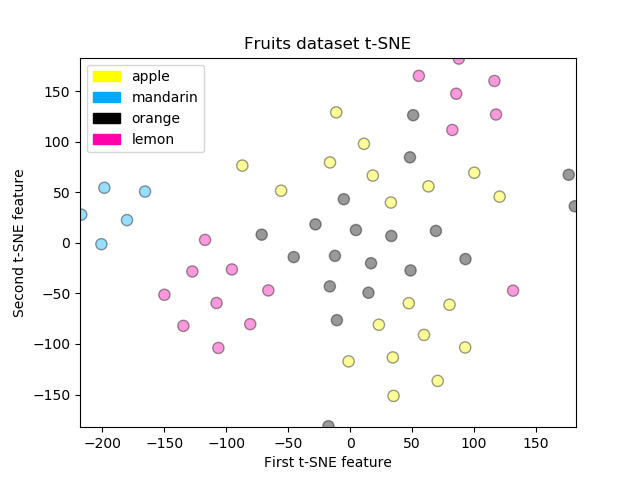

In [99]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

# each feature should be centered (zero mean) and with unit variance
X_fruits_normalized = StandardScaler().fit(X_fruits).transform(X_fruits)  

tsne = TSNE(random_state = 0)

X_tsne = tsne.fit_transform(X_fruits_normalized)

plot_labelled_scatter(X_tsne, np.array(y_fruits).reshape(-1), 
    ['apple', 'mandarin', 'orange', 'lemon'])
plt.xlabel('First t-SNE feature')
plt.ylabel('Second t-SNE feature')
plt.title('Fruits dataset t-SNE');

#### t-SNE on the breast cancer dataset

Although not shown in the lecture video, this example is included for comparison, showing the results of running t-SNE on the breast cancer dataset.  See the reading "How to Use t-SNE effectively" for further details on how the visualizations from t-SNE are affected by specific parameter settings.

<IPython.core.display.Javascript object>


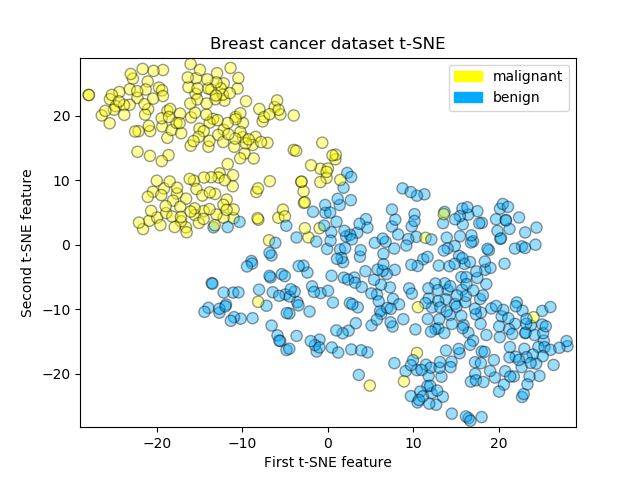

In [100]:
tsne = TSNE(random_state = 0)

X_tsne = tsne.fit_transform(X_normalized)

plot_labelled_scatter(X_tsne, y_cancer, 
    ['malignant', 'benign'])
plt.xlabel('First t-SNE feature')
plt.ylabel('Second t-SNE feature')
plt.title('Breast cancer dataset t-SNE');

## Clustering

### K-means

This example from the lecture video creates an artificial dataset with make_blobs, then applies k-means to find 3 clusters, and plots the points in each cluster identified by a corresponding color.

<IPython.core.display.Javascript object>


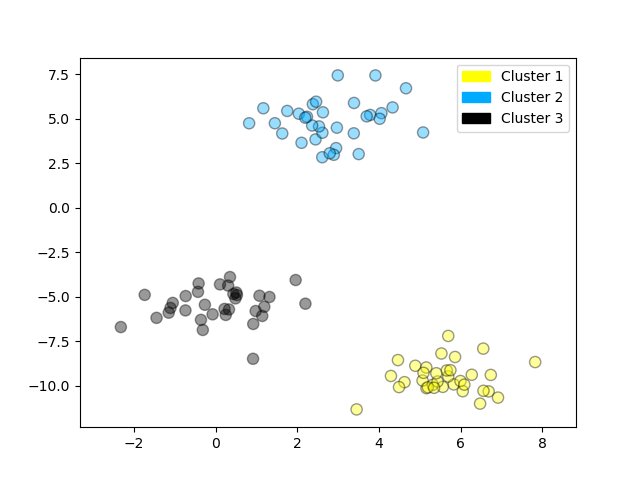

In [2]:
%matplotlib notebook
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from adspy_shared_utilities import plot_labelled_scatter

X, y = make_blobs(random_state = 10)

kmeans = KMeans(n_clusters = 3)
kmeans.fit(X)

plot_labelled_scatter(X, kmeans.labels_, ['Cluster 1', 'Cluster 2', 'Cluster 3'])


In [9]:
X
# X.shape

array([[ -2.32496308,  -6.6999964 ],
       [  0.51856831,  -4.90086804],
       [  2.44301805,   3.84652646],
       [  5.82662285,  -9.92259335],
       [  2.03300209,   5.28990817],
       [  3.37979515,   4.18880872],
       [  6.04774884, -10.30504657],
       [ -0.42084194,  -4.24889336],
       [  3.78067293,   5.22062163],
       [  5.69248303,  -7.19999368],
       [  5.15909568, -10.13427003],
       [  1.16464321,   5.59667831],
       [  2.94601402,   3.3575069 ],
       [  1.1882891 ,  -5.56058781],
       [ -0.31748917,  -6.86337766],
       [  4.32968132,   5.64396726],
       [  4.28981065,  -9.44982413],
       [  3.49996332,   3.02156553],
       [  5.31414039,  -9.94714146],
       [  2.61105267,   4.22218469],
       [  4.88653379,  -8.87680099],
       [  1.95552599,  -4.05690149],
       [  2.09985134,   3.6556301 ],
       [  1.31468967,  -5.01055177],
       [  5.52556208,  -8.18696464],
       [  0.81677922,   4.75330395],
       [  2.52859794,   4.5759393 ],
 

In [8]:
kmeans.labels_
# kmeans.labels_.shape

array([2, 2, 1, 0, 1, 1, 0, 2, 1, 0, 0, 1, 1, 2, 2, 1, 0, 1, 0, 1, 0, 2,
       1, 2, 0, 1, 1, 1, 1, 0, 2, 1, 1, 0, 2, 2, 2, 1, 1, 1, 2, 0, 2, 2,
       1, 0, 0, 0, 2, 0, 1, 2, 0, 0, 2, 0, 1, 2, 0, 0, 1, 1, 2, 2, 2, 0,
       0, 2, 2, 2, 1, 0, 1, 1, 2, 1, 1, 2, 0, 0, 0, 1, 0, 1, 2, 1, 2, 0,
       2, 2, 0, 0, 0, 2, 2, 2, 1, 0, 0, 0])

Example showing k-means used to find 4 clusters in the fruits dataset.  Note that in general, it's important to scale the individual features before applying k-means clustering.

D:\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  
D:\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys


<IPython.core.display.Javascript object>


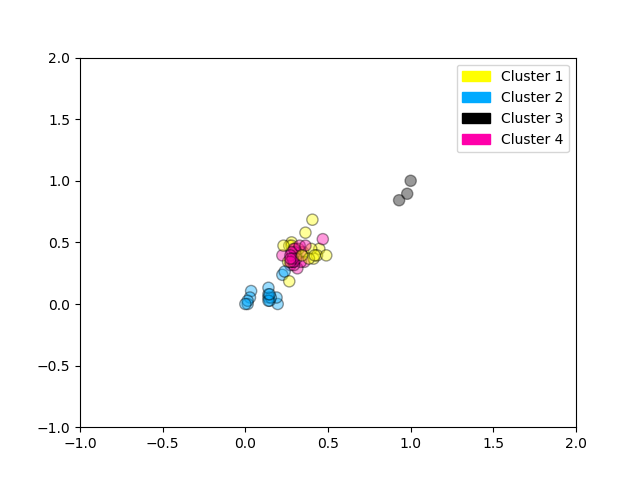

In [72]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from adspy_shared_utilities import plot_labelled_scatter
from sklearn.preprocessing import MinMaxScaler

fruits = pd.read_table('fruit_data_with_colors.txt')
X_fruits = fruits[['mass','width','height', 'color_score']].as_matrix()
y_fruits = fruits[['fruit_label']] - 1

# if features have very different ranges, training data need to be normalized using MinMaxScaler()
X_fruits_normalized = MinMaxScaler().fit(X_fruits).transform(X_fruits)  

kmeans = KMeans(n_clusters = 4, random_state = 0)
kmeans.fit(X_fruits_normalized)
# kmeans.fit(X_fruits)

plot_labelled_scatter(X_fruits_normalized, kmeans.labels_, 
                      ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4'])

D:\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  
D:\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys


<IPython.core.display.Javascript object>


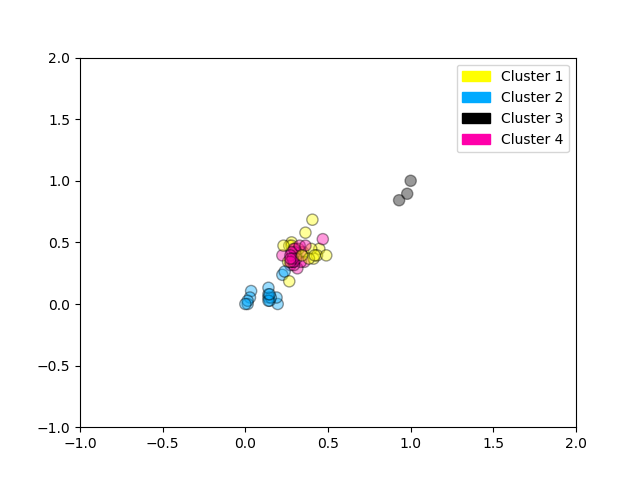

array([0, 0, 0, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 3, 3, 3, 3,
       3, 3, 2, 2, 2, 0, 1, 3, 3, 3, 3, 0, 0, 0, 3, 3, 3, 1, 3, 3, 3, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1])

In [79]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from adspy_shared_utilities import plot_labelled_scatter
from sklearn.preprocessing import MinMaxScaler

fruits = pd.read_table('fruit_data_with_colors.txt')
X_fruits = fruits[['mass','width','height', 'color_score']].as_matrix()
y_fruits = fruits[['fruit_label']] - 1

# if features have very different ranges, training data need to be normalized using MinMaxScaler()
X_fruits_normalized = MinMaxScaler().fit(X_fruits).transform(X_fruits)  

kmeans = KMeans(n_clusters = 4, random_state = 0)
kmeans.fit(X_fruits_normalized)
kmeans_label = kmeans.predict(X_fruits_normalized)   #same as kmeans.labels_

plot_labelled_scatter(X_fruits_normalized, kmeans_label, 
                      ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4'])

kmeans_assignment

In [34]:
fruits[['mass','width','height', 'color_score']]

,mass,width,height,color_score
0,192,8.4,7.3,0.55
1,180,8.0,6.8,0.59
2,176,7.4,7.2,0.60
3,86,6.2,4.7,0.80
4,84,6.0,4.6,0.79
5,80,5.8,4.3,0.77
6,80,5.9,4.3,0.81
7,76,5.8,4.0,0.81
8,178,7.1,7.8,0.92
9,172,7.4,7.0,0.89


In [35]:
fruits[['mass','width','height', 'color_score']].as_matrix()

D:\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


array([[192.  ,   8.4 ,   7.3 ,   0.55],
       [180.  ,   8.  ,   6.8 ,   0.59],
       [176.  ,   7.4 ,   7.2 ,   0.6 ],
       [ 86.  ,   6.2 ,   4.7 ,   0.8 ],
       [ 84.  ,   6.  ,   4.6 ,   0.79],
       [ 80.  ,   5.8 ,   4.3 ,   0.77],
       [ 80.  ,   5.9 ,   4.3 ,   0.81],
       [ 76.  ,   5.8 ,   4.  ,   0.81],
       [178.  ,   7.1 ,   7.8 ,   0.92],
       [172.  ,   7.4 ,   7.  ,   0.89],
       [166.  ,   6.9 ,   7.3 ,   0.93],
       [172.  ,   7.1 ,   7.6 ,   0.92],
       [154.  ,   7.  ,   7.1 ,   0.88],
       [164.  ,   7.3 ,   7.7 ,   0.7 ],
       [152.  ,   7.6 ,   7.3 ,   0.69],
       [156.  ,   7.7 ,   7.1 ,   0.69],
       [156.  ,   7.6 ,   7.5 ,   0.67],
       [168.  ,   7.5 ,   7.6 ,   0.73],
       [162.  ,   7.5 ,   7.1 ,   0.83],
       [162.  ,   7.4 ,   7.2 ,   0.85],
       [160.  ,   7.5 ,   7.5 ,   0.86],
       [156.  ,   7.4 ,   7.4 ,   0.84],
       [140.  ,   7.3 ,   7.1 ,   0.87],
       [170.  ,   7.6 ,   7.9 ,   0.88],
       [342.  , 

In [39]:
fruits[['fruit_label']]

,fruit_label
0,1
1,1
2,1
3,2
4,2
5,2
6,2
7,2
8,1
9,1


In [40]:
fruits[['fruit_label']].shape

(59, 1)

In [43]:
fruits['fruit_label']

0     1
1     1
2     1
3     2
4     2
5     2
6     2
7     2
8     1
9     1
10    1
11    1
12    1
13    1
14    1
15    1
16    1
17    1
18    1
19    1
20    1
21    1
22    1
23    1
24    3
25    3
26    3
27    3
28    3
29    3
30    3
31    3
32    3
33    3
34    3
35    3
36    3
37    3
38    3
39    3
40    3
41    3
42    3
43    4
44    4
45    4
46    4
47    4
48    4
49    4
50    4
51    4
52    4
53    4
54    4
55    4
56    4
57    4
58    4
Name: fruit_label, dtype: int64

In [41]:
fruits['fruit_label'].shape

(59,)

In [50]:
fruits[['fruit_label']].as_matrix()

D:\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


array([[1],
       [1],
       [1],
       [2],
       [2],
       [2],
       [2],
       [2],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [4],
       [4],
       [4],
       [4],
       [4],
       [4],
       [4],
       [4],
       [4],
       [4],
       [4],
       [4],
       [4],
       [4],
       [4],
       [4]], dtype=int64)

In [51]:
fruits[['fruit_label']].as_matrix().shape

D:\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


(59, 1)

In [48]:
fruits['fruit_label'].as_matrix()

D:\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


array([1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4], dtype=int64)

In [52]:
fruits['fruit_label'].as_matrix().shape

D:\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


(59,)

### Agglomerative clustering

<IPython.core.display.Javascript object>


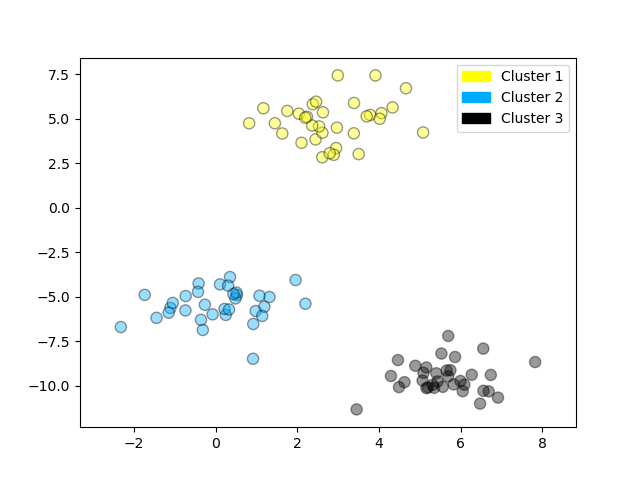

array([1, 1, 0, 2, 0, 0, 2, 1, 0, 2, 2, 0, 0, 1, 1, 0, 2, 0, 2, 0, 2, 1,
       0, 1, 2, 0, 0, 0, 0, 2, 1, 0, 0, 2, 1, 1, 1, 0, 0, 0, 1, 2, 1, 1,
       0, 2, 2, 2, 1, 2, 0, 1, 2, 2, 1, 2, 0, 1, 2, 2, 0, 0, 1, 1, 1, 2,
       2, 1, 1, 1, 0, 2, 0, 0, 1, 0, 0, 1, 2, 2, 2, 0, 2, 0, 1, 0, 1, 2,
       1, 1, 2, 2, 2, 1, 1, 1, 0, 2, 2, 2], dtype=int64)

In [81]:
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
from adspy_shared_utilities import plot_labelled_scatter

X, y = make_blobs(random_state = 10)

cls = AgglomerativeClustering(n_clusters = 3)
cls_label = cls.fit_predict(X)

plot_labelled_scatter(X, cls_label, 
        ['Cluster 1', 'Cluster 2', 'Cluster 3'])

cls.labels_   #same as predict(X)

In [74]:
cls_assignment

array([1, 1, 0, 2, 0, 0, 2, 1, 0, 2, 2, 0, 0, 1, 1, 0, 2, 0, 2, 0, 2, 1,
       0, 1, 2, 0, 0, 0, 0, 2, 1, 0, 0, 2, 1, 1, 1, 0, 0, 0, 1, 2, 1, 1,
       0, 2, 2, 2, 1, 2, 0, 1, 2, 2, 1, 2, 0, 1, 2, 2, 0, 0, 1, 1, 1, 2,
       2, 1, 1, 1, 0, 2, 0, 0, 1, 0, 0, 1, 2, 2, 2, 0, 2, 0, 1, 0, 1, 2,
       1, 1, 2, 2, 2, 1, 1, 1, 0, 2, 2, 2], dtype=int64)

#### Creating a dendrogram (using scipy)

This dendrogram plot is based on the dataset created in the previous step with make_blobs, but for clarity, only 10 samples have been selected for this example, as plotted here:

<IPython.core.display.Javascript object>


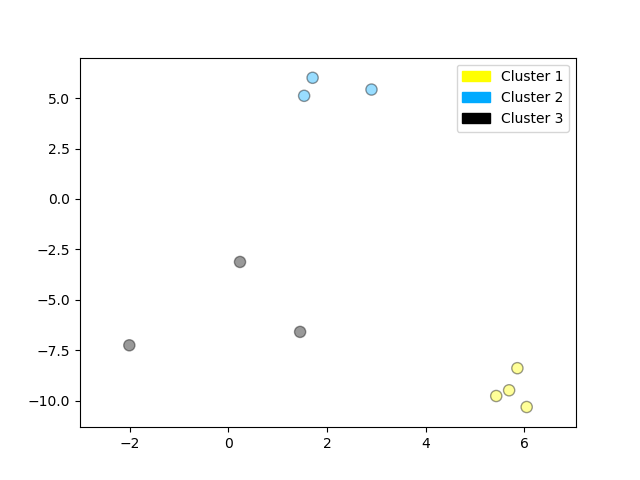

[[  5.69192445  -9.47641249]
 [  1.70789903   6.00435173]
 [  0.23621041  -3.11909976]
 [  2.90159483   5.42121526]
 [  5.85943906  -8.38192364]
 [  6.04774884 -10.30504657]
 [ -2.00758803  -7.24743939]
 [  1.45467725  -6.58387198]
 [  1.53636249   5.11121453]
 [  5.4307043   -9.75956122]]


In [82]:
X, y = make_blobs(random_state = 10, n_samples = 10)
plot_labelled_scatter(X, y, 
        ['Cluster 1', 'Cluster 2', 'Cluster 3'])
print(X)

And here's the dendrogram corresponding to agglomerative clustering of the 10 points above using Ward's method.  The index 0..9 of the points corresponds to the index of the points in the X array above.  For example, point 0 (5.69, -9.47) and point 9 (5.43, -9.76) are the closest two points and are clustered first.

<IPython.core.display.Javascript object>


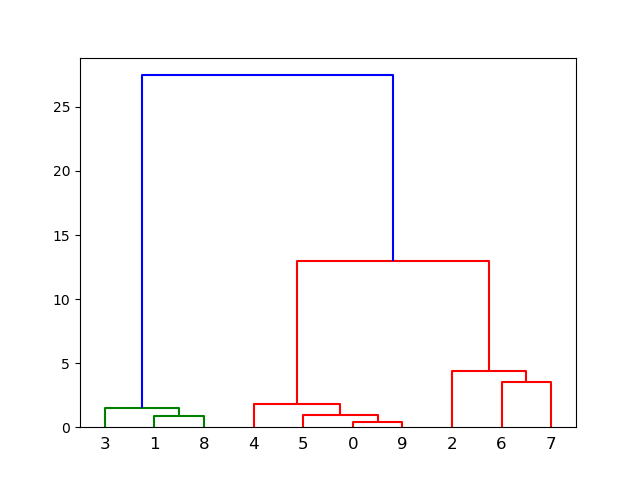

In [83]:
from scipy.cluster.hierarchy import ward, dendrogram
plt.figure()
dendrogram(ward(X))
plt.show()

### DBSCAN clustering (2 parameters)
#### eps: radius
#### min_samples

Cluster membership values:
[ 0  1  0  2  0  0  0  2  2 -1  1  2  0  0 -1  0  0  1 -1  1  1  2  2  2
  1]


<IPython.core.display.Javascript object>


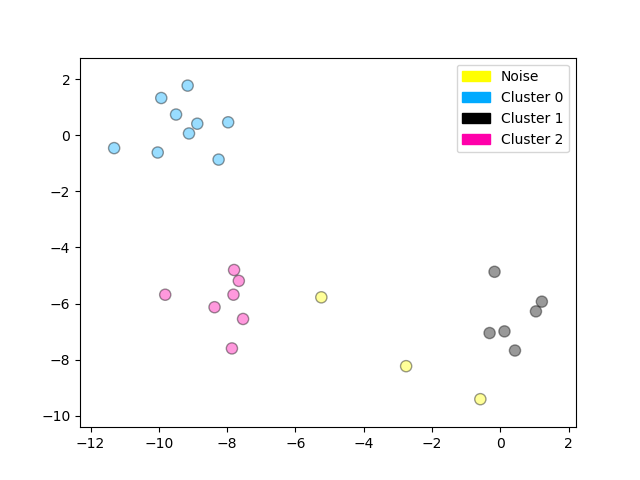

array([ 0,  1,  0,  2,  0,  0,  0,  2,  2, -1,  1,  2,  0,  0, -1,  0,  0,
        1, -1,  1,  1,  2,  2,  2,  1], dtype=int64)

In [86]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state = 9, n_samples = 25)

dbscan = DBSCAN(eps = 2, min_samples = 2)

dbscan_label = dbscan.fit_predict(X)
print("Cluster membership values:\n{}".format(cls))

plot_labelled_scatter(X, dbscan_label + 1, 
        ['Noise', 'Cluster 0', 'Cluster 1', 'Cluster 2'])

dbscan_label   #-1: noise, Cluster 0,1,2